**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 3: Neural Networks*

# Identification

Name: Ken Chan Thim <br/>
Student Number: 300208086

Name: <br/>
Student Number:

In [1]:
# Code cell


## 1. Analyse exploratoire

### Chargement de l'ensemble de données

Un ensemble de données a été créé pour ce devoir. Il est disponible sur un dépôt GitHub public :

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3)

Vous devez accéder à l'ensemble de données et le lire directement à partir de ce dépôt GitHub dans votre notebook Jupyter.

Utilisez cette cellule de code pour vos directives `import` et autres initialisations.

In [2]:
# Code cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. **Charger l'ensemble de données** :

    - Écrivez du code pour charger les trois ensembles de données.


In [3]:
# Code cell
df_train = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_train.csv", header=None)
df_test = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_test.csv", header=None)
df_valid = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_valid.csv", header=None)

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,453,454,455,456,457,458,459,460,461,462
0,2,0.0000,0.0556,0.0000,0.0556,0.1111,0.0000,0.0556,0.0000,0.0000,...,0.1667,0.2222,0.0000,0.0000,0.1667,0.0000,0.0,0.0000,0.000,0.0
1,2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.000,0.0
2,2,0.1905,0.0000,0.3333,0.0000,0.0000,0.0000,0.0000,0.0000,0.2857,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.1905,0.381,0.0
3,2,0.0225,0.0000,0.0112,0.1348,0.0000,0.0112,0.1348,0.0112,0.1685,...,0.0000,0.0787,0.0674,0.0112,0.0225,0.1573,0.0,0.0225,0.000,0.0
4,2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.6667,0.0000,0.0000,0.0,0.0000,0.000,0.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58291 entries, 0 to 58290
Columns: 463 entries, 0 to 462
dtypes: float64(462), int64(1)
memory usage: 205.9 MB


In [5]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,453,454,455,456,457,458,459,460,461,462
count,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,...,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000,58291.000000
mean,1.040349,0.081129,0.015958,0.056881,0.058845,0.039120,0.075578,0.022290,0.055313,0.054573,...,0.043422,0.034924,0.045785,0.059653,0.055848,0.067431,0.014030,0.034971,0.034169,0.000491
std,0.883748,0.170770,0.095076,0.154762,0.146985,0.133049,0.201984,0.096272,0.141717,0.135915,...,0.148612,0.105381,0.134625,0.142328,0.142496,0.156227,0.088168,0.126633,0.114237,0.013854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.083300,0.000000,0.033300,0.047600,0.000000,0.031200,0.000000,0.037000,0.047600,...,0.000000,0.024400,0.025600,0.055650,0.047600,0.055600,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988800,0.500000


### Prétraitement des données

2. **Brasser les lignes** :

    - Étant donné que les exemples sont générés en faisant glisser une fenêtre sur chaque séquence de protéines, la plupart des exemples adjacents proviennent de la même protéine et partagent 20 positions. Pour atténuer l'impact potentiel négatif sur l'entraînement du modèle, la première étape consiste à brasser (*shuffle*) les **lignes** de la matrice de données.


In [6]:
# Code cell

# https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_valid = df_valid.sample(frac=1).reset_index(drop=True)

print(f"After shuffling: \n{df_train.head()}")

After shuffling: 
   0       1    2       3       4       5       6       7       8       9    \
0    2  0.6786  0.0  0.0000  0.0000  0.0000  0.2500  0.0000  0.0000  0.0000   
1    0  0.0598  0.0  0.0217  0.0326  0.0598  0.5109  0.0054  0.0109  0.0217   
2    1  0.0000  0.0  0.7273  0.0000  0.0000  0.0000  0.0000  0.0000  0.0303   
3    2  0.3750  0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
4    0  0.0000  0.0  0.0000  0.0000  0.1458  0.0208  0.0000  0.3750  0.0000   

   ...     453     454     455     456     457     458  459    460     461  \
0  ...  0.1071  0.0357  0.0000  0.3929  0.0714  0.0357  0.0  0.000  0.0000   
1  ...  0.0489  0.0054  0.0109  0.2826  0.0598  0.0000  0.0  0.000  0.0000   
2  ...  0.0606  0.1818  0.0303  0.0303  0.0909  0.0606  0.0  0.000  0.0909   
3  ...  0.0000  0.0000  0.8750  0.0000  0.0000  0.0000  0.0  0.000  0.0000   
4  ...  0.0208  0.0000  0.0625  0.1458  0.2083  0.0000  0.0  0.125  0.0208   

   462  
0  0.0  
1  0.0  
2  0.0  
3 

3. **Mise à l'échelle des caractéristiques numériques** :

    - Étant donné que les 462 caractéristiques sont des proportions représentées par des valeurs comprises entre 0 et 1, la mise à l'échelle peut ne pas être nécessaire. Dans nos évaluations, l'utilisation de [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) a en fait dégradé les performances du modèle. Dans votre flux de traitement, comparez les effets de ne pas mettre à l'échelle les données par rapport à l'application de [MinMaxScaler](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Par souci de temps, une seule expérience suffira. Il est important de noter que lorsque la mise à l'échelle est appliquée, une méthode uniforme doit être utilisée pour toutes les colonnes, compte tenu de leur nature homogène.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# apply scaler to features but not target
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train.iloc[:, 1:]), columns=df_train.columns[1:])
df_test_scaled = pd.DataFrame(scaler.transform(df_test.iloc[:, 1:]), columns=df_test.columns[1:])
df_valid_scaled = pd.DataFrame(scaler.transform(df_valid.iloc[:, 1:]), columns=df_valid.columns[1:])

df_train_scaled.head()

,1,2,3,4,5,6,7,8,9,10,...,453,454,455,456,457,458,459,460,461,462
0,0.6786,0.0,0.0000,0.0000,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,...,0.1071,0.0357,0.0000,0.3929,0.0714,0.0357,0.0,0.000,0.000000,0.0
1,0.0598,0.0,0.0217,0.0326,0.0598,0.5109,0.0054,0.0109,0.0217,0.0000,...,0.0489,0.0054,0.0109,0.2826,0.0598,0.0000,0.0,0.000,0.000000,0.0
2,0.0000,0.0,0.7273,0.0000,0.0000,0.0000,0.0000,0.0000,0.0303,0.0000,...,0.0606,0.1818,0.0303,0.0303,0.0909,0.0606,0.0,0.000,0.091930,0.0
3,0.3750,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.8750,0.0000,0.0000,0.0000,0.0,0.000,0.000000,0.0
4,0.0000,0.0,0.0000,0.0000,0.1458,0.0208,0.0000,0.3750,0.0000,0.1042,...,0.0208,0.0000,0.0625,0.1458,0.2083,0.0000,0.0,0.125,0.021036,0.0


> ## Findings of 3. Mise à l'échelle des caractéristiques numériques
>
> As we can see from the results in [5. Développement et évaluation des modèles](#développement-et-évaluation-des-modèles), there are minimal differences between using the unscaled data and data that was scaled using MinMaxScaler. This makes sense because of the way MinMaxScaler works because the feature values are already between 0 and 1, and MinMaxScaler works by scaling the feature values between 0 and 1.

4. **Séparation des cibles et des données** :

    - Dans les fichiers CSV, les cibles et les données sont combinées. Pour préparer nos expériences d'apprentissage automatique, séparez les données d'entraînement $X$ et le vecteur cible $y$ pour chacun des trois ensembles de données.

In [8]:
# Code cell

X_train_scaled, y_train = df_train_scaled, df_train.iloc[:, 0]
X_test_scaled, y_test = df_test_scaled, df_test.iloc[:, 0]
X_valid_scaled, y_valid = df_valid_scaled, df_valid.iloc[:, 0]

X_train_unscaled = df_train.iloc[:, 1:]
X_test_unscaled = df_test.iloc[:, 1:]
X_valid_unscaled = df_valid.iloc[:, 1:]

In [9]:
X_train_scaled.head()

,1,2,3,4,5,6,7,8,9,10,...,453,454,455,456,457,458,459,460,461,462
0,0.6786,0.0,0.0000,0.0000,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,...,0.1071,0.0357,0.0000,0.3929,0.0714,0.0357,0.0,0.000,0.000000,0.0
1,0.0598,0.0,0.0217,0.0326,0.0598,0.5109,0.0054,0.0109,0.0217,0.0000,...,0.0489,0.0054,0.0109,0.2826,0.0598,0.0000,0.0,0.000,0.000000,0.0
2,0.0000,0.0,0.7273,0.0000,0.0000,0.0000,0.0000,0.0000,0.0303,0.0000,...,0.0606,0.1818,0.0303,0.0303,0.0909,0.0606,0.0,0.000,0.091930,0.0
3,0.3750,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.8750,0.0000,0.0000,0.0000,0.0,0.000,0.000000,0.0
4,0.0000,0.0,0.0000,0.0000,0.1458,0.0208,0.0000,0.3750,0.0000,0.1042,...,0.0208,0.0000,0.0625,0.1458,0.2083,0.0000,0.0,0.125,0.021036,0.0


In [10]:
y_train.head()

0    2
1    0
2    1
3    2
4    0
Name: 0, dtype: int64

In [11]:
y_train.value_counts()

0
2    23986
0    21634
1    12671
Name: count, dtype: int64

### Développement et évaluation des modèles

5. **Développement de modèle** :

    - **Modèle de base** : Implémentez un modèle utilisant le [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Ce modèle ignore les données d'entrée et prédit la classe majoritaire. Un tel modèle est parfois appelé modèle « homme de paille ».

    - **Modèle de référence** : Comme modèle de référence, sélectionnez un des algorithmes d'apprentissage automatique précédemment étudiés : arbres de décision, k-plus proches voisins (KNN) ou régression logistique. Utilisez les paramètres par défaut fournis par scikit-learn pour entraîner chaque modèle en tant que modèle de référence. Pourquoi avez-vous choisi ce classificateur particulier ? Pourquoi pensez-vous qu'il soit approprié pour cette tâche spécifique ?

    - **Modèle de réseau de neurones** : En utilisant [Keras](https://keras.io) et [TensorFlow](https://www.tensorflow.org), construisez un modèle séquentiel comprenant une couche d'entrée, une couche cachée et une couche de sortie. La couche d'entrée doit comporter 462 nœuds, correspondant aux 462 attributs de chaque exemple. La couche cachée doit comprendre 8 nœuds et utiliser la fonction d'activation par défaut. La couche de sortie doit comporter trois nœuds, correspondant aux trois classes : hélice (0), feuillet (1) et enroulement (2). Appliquez la fonction d'activation softmax à la couche de sortie pour que les sorties soient traitées comme des probabilités, avec leur somme égale à 1 pour chaque exemple d'entraînement.

    Nous avons donc trois modèles : de base, de référence et réseau de neurones.

In [12]:
# Code cell

# Dummy classifier
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_scaled, y_train)
dummy_clf.score(X_valid_scaled, y_valid)

0.41989472263463357

> ## Reference model
> 
> We choose the reference model to be a Decision Tree because ############

In [13]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_unscaled, y_train)
dt_score = dt_clf.score(X_valid_unscaled, y_valid)

dt_clf_scaled = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
dt_clf_scaled.fit(X_train_scaled, y_train)
dt_scaled_score = dt_clf_scaled.score(X_valid_scaled, y_valid)

print(f"Score without scaling: {dt_score}")
print(f"Score with scaling: {dt_scaled_score}")

Score without scaling: 0.5002024564718586
Score with scaling: 0.5015521662842489


In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_unscaled, y_train)
knn_score = knn_clf.score(X_valid_unscaled, y_valid)

knn_clf_scaled = KNeighborsClassifier()
knn_clf_scaled.fit(X_train_scaled, y_train)
knn_scaled_score = knn_clf_scaled.score(X_valid_scaled, y_valid)

print(f"Score without scaling: {knn_score}")
print(f"Score with scaling: {knn_scaled_score}")

Score without scaling: 0.4289377783776488
Score with scaling: 0.4273181266027804


In [15]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_unscaled, y_train)
lr_score = lr_clf.score(X_valid_unscaled, y_valid)

lr_clf_scaled = LogisticRegression()
lr_clf_scaled.fit(X_train_scaled, y_train)
lr_scaled_score = lr_clf_scaled.score(X_valid_scaled, y_valid)

print(f"Score without scaling: {lr_score}")
print(f"Score with scaling: {lr_scaled_score}")

Score without scaling: 0.6720205155891483
Score with scaling: 0.6731002834390606


In [16]:
# Keras and tensorflow

import tensorflow as tf

tf.random.set_seed(42)

keras_model_scaled = tf.keras.Sequential()

keras_model_scaled.add(tf.keras.layers.Dense(462, input_dim=462, activation='relu'))
keras_model_scaled.add(tf.keras.layers.Dense(8))
keras_model_scaled.add(tf.keras.layers.Dense(3, activation='softmax'))

keras_model_scaled.summary()

2024-11-10 13:49:45.451570: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-10 13:49:45.523058: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-10 13:49:45.605298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731264585.686031   45817 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731264585.709715   45817 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 13:49:45.915358: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 462)            │       213,906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         3,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,637 (850.14 KB)

 Trainable params: 217,637 (850.14 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
keras_model_scaled.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = keras_model_scaled.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=40)

Epoch 1/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4811 - loss: 1.0264 - val_accuracy: 0.6233 - val_loss: 0.8694
Epoch 2/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6581 - loss: 0.8045 - val_accuracy: 0.6632 - val_loss: 0.7797
Epoch 3/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6851 - loss: 0.7432 - val_accuracy: 0.6689 - val_loss: 0.7698
Epoch 4/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6927 - loss: 0.7300 - val_accuracy: 0.6704 - val_loss: 0.7663
Epoch 5/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.6955 - loss: 0.7223 - val_accuracy: 0.6711 - val_loss: 0.7636
Epoch 6/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6990 - loss: 0.7153 - val_accuracy: 0.6724 - val_loss: 0.7611
Epoch 7/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7025 - loss: 0.7078 - val_accuracy: 0.6730 - val_loss: 0.7582
Epoch 8/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7067 - loss: 0.6992 

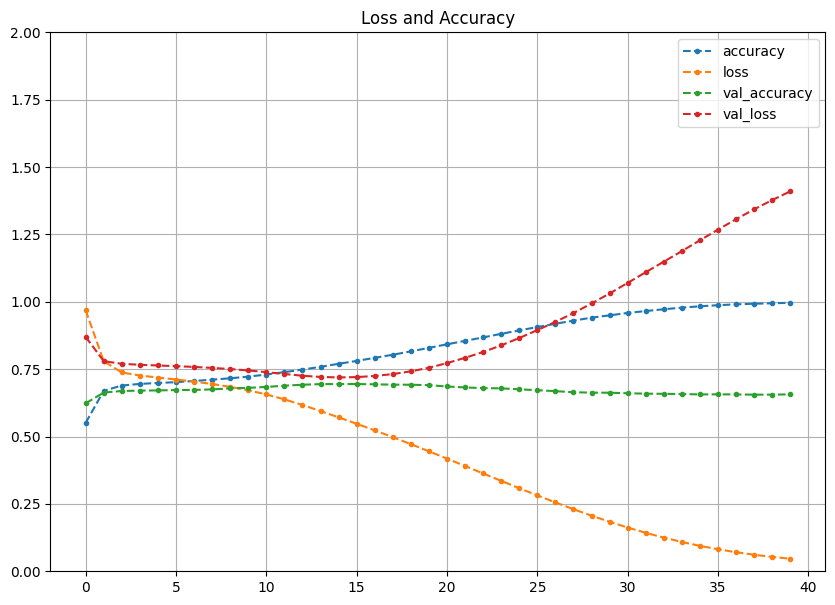

In [18]:
pd.DataFrame(history.history).plot(
    grid=True, figsize=(10, 7), title="Loss and Accuracy", style="--.", ylim=(0, 2)
)
plt.legend(loc="best")
plt.show()

6. **Évaluation des modèles** :

    - Utilisez la validation croisée pour évaluer les performances du modèle de référence. Sélectionnez un petit nombre de plis (*plis*) pour éviter des temps de calcul excessives.

    - **L'entraînement des réseaux de neurones peut être long.** Par conséquent, leurs performances sont généralement évaluées une seule fois en utilisant un ensemble de validation. Assurez-vous de ne pas utiliser l'ensemble de test avant la fin du devoir.

    - Évaluez les modèles en utilisant des métriques telles que la précision, le rappel et le score F1.

In [19]:
# Code cell
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

def cross_eval_models(model_dict, X_train_, y_train_):
    model_scores = {}
    metrics = {
            "precision": make_scorer(precision_score, average='weighted', zero_division=0),
            "recall": make_scorer(recall_score, average='weighted'),
            "accuracy": make_scorer(accuracy_score),
            "f1": make_scorer(f1_score, average='weighted')
        }
    strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for name, model in model_dict.items():
        print(f"Model: {name}")
        model_scores[name] = {}
        for metric_name, scorer in metrics.items():
            scores = cross_val_score(model, X_train_, y_train_, scoring=scorer, cv=strat_kfold, n_jobs=-1) 
            print(f"{metric_name}: {scores}")
            print(f"Mean {metric_name}: {scores.mean():.3f}")
            print(f"StandardDeviation: {scores.std():.3f}")
            model_scores[name][metric_name] = {"scores": scores, "mean": scores.mean(), "std": scores.std()}
        print()
    return model_scores

In [20]:
model_dict = {"dummy": dummy_clf, "dt": dt_clf_scaled, "knn": knn_clf, "lr": lr_clf}
model_scores = cross_eval_models(model_dict, X_train_scaled, y_train)

Model: dummy
precision: [0.16935495 0.1693134  0.1693134  0.1693134  0.1693134 ]
Mean precision: 0.169
StandardDeviation: 0.000
recall: [0.41152758 0.4114771  0.4114771  0.4114771  0.4114771 ]
Mean recall: 0.411
StandardDeviation: 0.000
accuracy: [0.41152758 0.4114771  0.4114771  0.4114771  0.4114771 ]
Mean accuracy: 0.411
StandardDeviation: 0.000
f1: [0.23995981 0.23990953 0.23990953 0.23990953 0.23990953]
Mean f1: 0.240
StandardDeviation: 0.000

Model: dt
precision: [0.42131046 0.42182486 0.42181508 0.42520285 0.42017455]
Mean precision: 0.422
StandardDeviation: 0.002
recall: [0.5061326  0.50926402 0.51192314 0.51158003 0.50540401]
Mean recall: 0.509
StandardDeviation: 0.003
accuracy: [0.5061326  0.50926402 0.51192314 0.51158003 0.50540401]
Mean accuracy: 0.509
StandardDeviation: 0.003
f1: [0.44479556 0.44667116 0.44979898 0.44883955 0.44373022]
Mean f1: 0.447
StandardDeviation: 0.002

Model: knn
precision: [0.49741901 0.48267179 0.49114429 0.49487143 0.49702668]
Mean precision: 0.49

In [21]:
from sklearn.metrics import classification_report

y_pred = keras_model_scaled.predict(X_valid_scaled)

keras_scores = classification_report(y_valid, y_pred.argmax(axis=1))
print(keras_scores)

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2490
           1       0.61      0.52      0.56      1808
           2       0.65      0.70      0.67      3111

    accuracy                           0.66      7409
   macro avg       0.65      0.64      0.64      7409
weighted avg       0.65      0.66      0.65      7409



### Optimisation des hyperparamètres

7. **Modèle de référence :**

    - Pour assurer une comparaison équitable avec notre modèle de référence, nous examinerons comment la variation des hyperparamètres affecte ses performances. Cela évite la conclusion erronée selon laquelle les réseaux de neurones sont intrinsèquement meilleurs, alors qu'en réalité, un ajustement adéquat des hyperparamètres pourrait améliorer les performances du modèle de référence.

    - Concentrez-vous sur les hyperparamètres suivants pour chaque modèle :

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : `criterion` et `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) : `penalty`, `max_iter`, et `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) : `n_neighbors` et `weights`.

    - Utilisez une stratégie de recherche par grille ou les méthodes intégrées de scikit-learn [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) pour évaluer de manière exhaustive toutes les combinaisons de valeurs d'hyperparamètres. La validation croisée doit être utilisée pour évaluer chaque combinaison.

    - Quantifiez les performances de chaque configuration d'hyperparamètres en utilisant des métriques telles que la précision, le rappel et le score F1.

    - Analysez les résultats et fournissez des aperçus sur quelles configurations d'hyperparamètres ont obtenu des performances optimales pour chaque modèle.

In [22]:
# Code cell

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

def grid_search(model, param_grid, X_train_, y_train_, X_test_, y_test_):
    grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train_, y_train_)
    print(f"Best hyperparameters: {grid.best_params_}")
    print(f"Best score: {grid.best_score_}")
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_)
    
    report = classification_report(y_test_, y_pred)
    print(f"Classification report:\n{report}")
        
    return grid

In [23]:
param_grid_dt = [
    {'max_depth': range(1, 10), # default = None
   'criterion': ["gini", "entropy", "log_loss"] }, # default = gini
]
param_grid_kn = [
  {'n_neighbors': range(3, 10),  # default = 5
   'weights': ["uniform", "distance"]} # default = uniform
]
param_grid_lr = [ 
  {'penalty': ["l2", None], # default = l2 (Note: default solver lbfgs supports only 'l2' or None penalties, so "elasticnet" and "l1" are not supported)
   'max_iter' : [100, 200, 400, 800, 1600], # default = 100
   'tol' : [0.01, 0.001, 0.0001]} # default = 1e-4 
] 

In [24]:
dt_model = DecisionTreeClassifier()
dt_grid = grid_search(dt_model, param_grid_dt, X_train_scaled, y_train, X_valid_scaled, y_valid)

Best hyperparameters: {'criterion': 'log_loss', 'max_depth': 9}
Best score: 0.5596404377843415
Classification report:
              precision    recall  f1-score   support

           0       0.49      0.67      0.56      2490
           1       0.52      0.30      0.38      1808
           2       0.62      0.58      0.60      3111

    accuracy                           0.54      7409
   macro avg       0.54      0.52      0.51      7409
weighted avg       0.55      0.54      0.53      7409



In [25]:
knn_model = KNeighborsClassifier()
knn_grid = grid_search(knn_model, param_grid_kn, X_train_scaled, y_train, X_valid_scaled, y_valid)

Best hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Best score: 0.48765664712746826
Classification report:
              precision    recall  f1-score   support

           0       0.40      0.81      0.54      2490
           1       0.50      0.17      0.26      1808
           2       0.56      0.32      0.41      3111

    accuracy                           0.45      7409
   macro avg       0.49      0.44      0.40      7409
weighted avg       0.49      0.45      0.42      7409



In [26]:
lr_model = LogisticRegression()
lr_grid = grid_search(lr_model, param_grid_lr, X_train_scaled, y_train, X_valid_scaled, y_valid)

Best hyperparameters: {'max_iter': 100, 'penalty': None, 'tol': 0.001}
Best score: 0.6867269059436764
Classification report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      2490
           1       0.66      0.46      0.54      1808
           2       0.68      0.76      0.72      3111

    accuracy                           0.67      7409
   macro avg       0.67      0.65      0.65      7409
weighted avg       0.67      0.67      0.67      7409



> ## OBSERVATIONS
> 

8. **Réseau de neurones :**

    Lors de notre exploration et ajustement des réseaux de neurones, nous nous concentrons sur les hyperparamètres suivants :

    - **Une seule couche cachée, en variant le nombre de nœuds**. 

        - Commencez avec un seul nœud dans la couche cachée. Utilisez un graphique pour représenter l'évolution de la perte et de la précision pour les ensembles d'entraînement et de validation, avec l'axe horizontal représentant le nombre d'époques d'entraînement et l'axe vertical représentant la perte et la précision. L'entraînement de ce réseau devrait être relativement rapide, nous allons donc procéder à un entraînement sur 50 époques. Que concluez-vous de l'observation du graphique ? Le réseau sous-apprend-il ou surapprend-il ? Pourquoi ?

In [27]:
# Code cell
def create_model_with_hidden_layer(num_node, epochs=50):
    print(f"Creating model with {num_node}")
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(462, input_dim=462, activation='relu'))
    model.add(tf.keras.layers.Dense(num_node))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=epochs)
    return history

histories = {}

In [31]:
histories[1] = create_model_with_hidden_layer(1,50)

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4107 - loss: 1.0553 - val_accuracy: 0.4735 - val_loss: 0.9993
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4731 - loss: 0.9646 - val_accuracy: 0.4995 - val_loss: 0.9622
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4828 - loss: 0.9361 - val_accuracy: 0.4986 - val_loss: 0.9562
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4840 - loss: 0.9292 - val_accuracy: 0.4913 - val_loss: 0.9523
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4925 - loss: 0.9229 - val_accuracy: 0.5052 - val_loss: 0.9461
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5201 - loss: 0.9126 - val_accuracy: 0.5236 - val_loss: 0.9344
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.5529 - loss: 0.8956 - val_accuracy: 0.5439 - val_loss: 0.9186
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5762 - loss: 0.8762 

- Répétez le processus ci-dessus en utilisant 2 et 4 nœuds dans la couche cachée. Utilisez le même type de graphique pour documenter vos observations concernant la perte et la précision.

In [67]:
# Code cell
histories[2] = create_model_with_hidden_layer(2,30)
histories[4] = create_model_with_hidden_layer(4,50)

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4467 - loss: 1.0445 - val_accuracy: 0.5589 - val_loss: 0.9473
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.6040 - loss: 0.8785 - val_accuracy: 0.6453 - val_loss: 0.8058
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6754 - loss: 0.7637 - val_accuracy: 0.6681 - val_loss: 0.7742
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6884 - loss: 0.7360 - val_accuracy: 0.6739 - val_loss: 0.7687
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6937 - loss: 0.7267 - val_accuracy: 0.6744 - val_loss: 0.7664
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6964 - loss: 0.7202 - val_accuracy: 0.6746 - val_loss: 0.7647
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6995 - loss: 0.7139 - val_accuracy: 0.6761 - val_loss: 0.7628
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7025 - loss: 0.7069 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4651 - loss: 1.0509 - val_accuracy: 0.5674 - val_loss: 0.9496
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6197 - loss: 0.8710 - val_accuracy: 0.6556 - val_loss: 0.7959
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6788 - loss: 0.7565 - val_accuracy: 0.6655 - val_loss: 0.7760
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6891 - loss: 0.7377 - val_accuracy: 0.6688 - val_loss: 0.7723
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6926 - loss: 0.7299 - val_accuracy: 0.6695 - val_loss: 0.7707
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6948 - loss: 0.7242 - val_accuracy: 0.6709 - val_loss: 0.7696
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.6978 - loss: 0.7188 - val_accuracy: 0.6712 - val_loss: 0.7685
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7004 - loss: 0.7133 

- Commencez avec 8 nœuds dans la couche cachée et doublez progressivement le nombre de nœuds jusqu'à ce qu'il dépasse le nombre de nœuds dans la couche d'entrée. Cela donne lieu à sept expériences et graphiques correspondants pour les configurations suivantes : 8, 16, 32, 64, 128, 256 et 512 nœuds. Documentez vos observations tout au long du processus.

In [33]:
# Code cell
histories[8] = create_model_with_hidden_layer(8,30)
histories[16] = create_model_with_hidden_layer(16,30)
histories[32] = create_model_with_hidden_layer(32,30)
histories[64] = create_model_with_hidden_layer(64,30)
histories[128] = create_model_with_hidden_layer(128,30)
histories[256] = create_model_with_hidden_layer(256,40)
histories[512] = create_model_with_hidden_layer(512,50)

Epoch 1/30


/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4777 - loss: 1.0206 - val_accuracy: 0.6299 - val_loss: 0.8684
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6613 - loss: 0.8008 - val_accuracy: 0.6608 - val_loss: 0.7808
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6864 - loss: 0.7429 - val_accuracy: 0.6678 - val_loss: 0.7716
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6917 - loss: 0.7307 - val_accuracy: 0.6695 - val_loss: 0.7690
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.6942 - loss: 0.7235 - val_accuracy: 0.6709 - val_loss: 0.7674
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6976 - loss: 0.7171 - val_accuracy: 0.6727 - val_loss: 0.7658
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7002 - loss: 0.7104 - val_accuracy: 0.6730 - val_loss: 0.7640
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7043 - loss: 0.7028 - val_accur

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4946 - loss: 1.0169 - val_accuracy: 0.6276 - val_loss: 0.8553
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6658 - loss: 0.7916 - val_accuracy: 0.6653 - val_loss: 0.7837
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6859 - loss: 0.7423 - val_accuracy: 0.6699 - val_loss: 0.7755
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6913 - loss: 0.7313 - val_accuracy: 0.6718 - val_loss: 0.7726
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6935 - loss: 0.7245 - val_accuracy: 0.6726 - val_loss: 0.7708
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6968 - loss: 0.7182 - val_accuracy: 0.6727 - val_loss: 0.7691
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.7000 - loss: 0.7118 - val_accuracy: 0.6747 - val_loss: 0.7674
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7033 - loss: 0.7046 - val_accur

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5069 - loss: 1.0071 - val_accuracy: 0.6276 - val_loss: 0.8436
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6639 - loss: 0.7899 - val_accuracy: 0.6641 - val_loss: 0.7788
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6861 - loss: 0.7430 - val_accuracy: 0.6711 - val_loss: 0.7711
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6915 - loss: 0.7311 - val_accuracy: 0.6715 - val_loss: 0.7684
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6959 - loss: 0.7237 - val_accuracy: 0.6732 - val_loss: 0.7666
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6992 - loss: 0.7170 - val_accuracy: 0.6747 - val_loss: 0.7645
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7029 - loss: 0.7101 - val_accuracy: 0.6758 - val_loss: 0.7625
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7071 - loss: 0.7024 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5159 - loss: 1.0007 - val_accuracy: 0.6311 - val_loss: 0.8335
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6684 - loss: 0.7809 - val_accuracy: 0.6614 - val_loss: 0.7783
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6858 - loss: 0.7406 - val_accuracy: 0.6691 - val_loss: 0.7715
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6923 - loss: 0.7301 - val_accuracy: 0.6697 - val_loss: 0.7687
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6960 - loss: 0.7230 - val_accuracy: 0.6709 - val_loss: 0.7666
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6991 - loss: 0.7163 - val_accuracy: 0.6734 - val_loss: 0.7646
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7019 - loss: 0.7092 - val_accuracy: 0.6758 - val_loss: 0.7622
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7060 - loss: 0.7010 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5020 - loss: 1.0162 - val_accuracy: 0.6249 - val_loss: 0.8502
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.6641 - loss: 0.7932 - val_accuracy: 0.6684 - val_loss: 0.7777
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6860 - loss: 0.7438 - val_accuracy: 0.6744 - val_loss: 0.7697
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6906 - loss: 0.7327 - val_accuracy: 0.6766 - val_loss: 0.7671
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6939 - loss: 0.7256 - val_accuracy: 0.6767 - val_loss: 0.7652
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6970 - loss: 0.7192 - val_accuracy: 0.6776 - val_loss: 0.7634
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7002 - loss: 0.7125 - val_accuracy: 0.6798 - val_loss: 0.7614
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7034 - loss: 0.7049 - val_accur

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5046 - loss: 1.0115 - val_accuracy: 0.6290 - val_loss: 0.8434
Epoch 2/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6664 - loss: 0.7873 - val_accuracy: 0.6676 - val_loss: 0.7799
Epoch 3/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6862 - loss: 0.7427 - val_accuracy: 0.6738 - val_loss: 0.7716
Epoch 4/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6916 - loss: 0.7316 - val_accuracy: 0.6736 - val_loss: 0.7685
Epoch 5/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6939 - loss: 0.7246 - val_accuracy: 0.6753 - val_loss: 0.7663
Epoch 6/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6967 - loss: 0.7181 - val_accuracy: 0.6758 - val_loss: 0.7643
Epoch 7/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7002 - loss: 0.7114 - val_accuracy: 0.6785 - val_loss: 0.7621
Epoch 8/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7038 - loss: 0.7040 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5150 - loss: 1.0084 - val_accuracy: 0.6296 - val_loss: 0.8416
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6683 - loss: 0.7851 - val_accuracy: 0.6657 - val_loss: 0.7800
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6849 - loss: 0.7422 - val_accuracy: 0.6703 - val_loss: 0.7721
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6921 - loss: 0.7317 - val_accuracy: 0.6730 - val_loss: 0.7692
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6948 - loss: 0.7250 - val_accuracy: 0.6732 - val_loss: 0.7673
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6979 - loss: 0.7190 - val_accuracy: 0.6746 - val_loss: 0.7657
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7009 - loss: 0.7127 - val_accuracy: 0.6762 - val_loss: 0.7639
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7048 - loss: 0.7058 - 

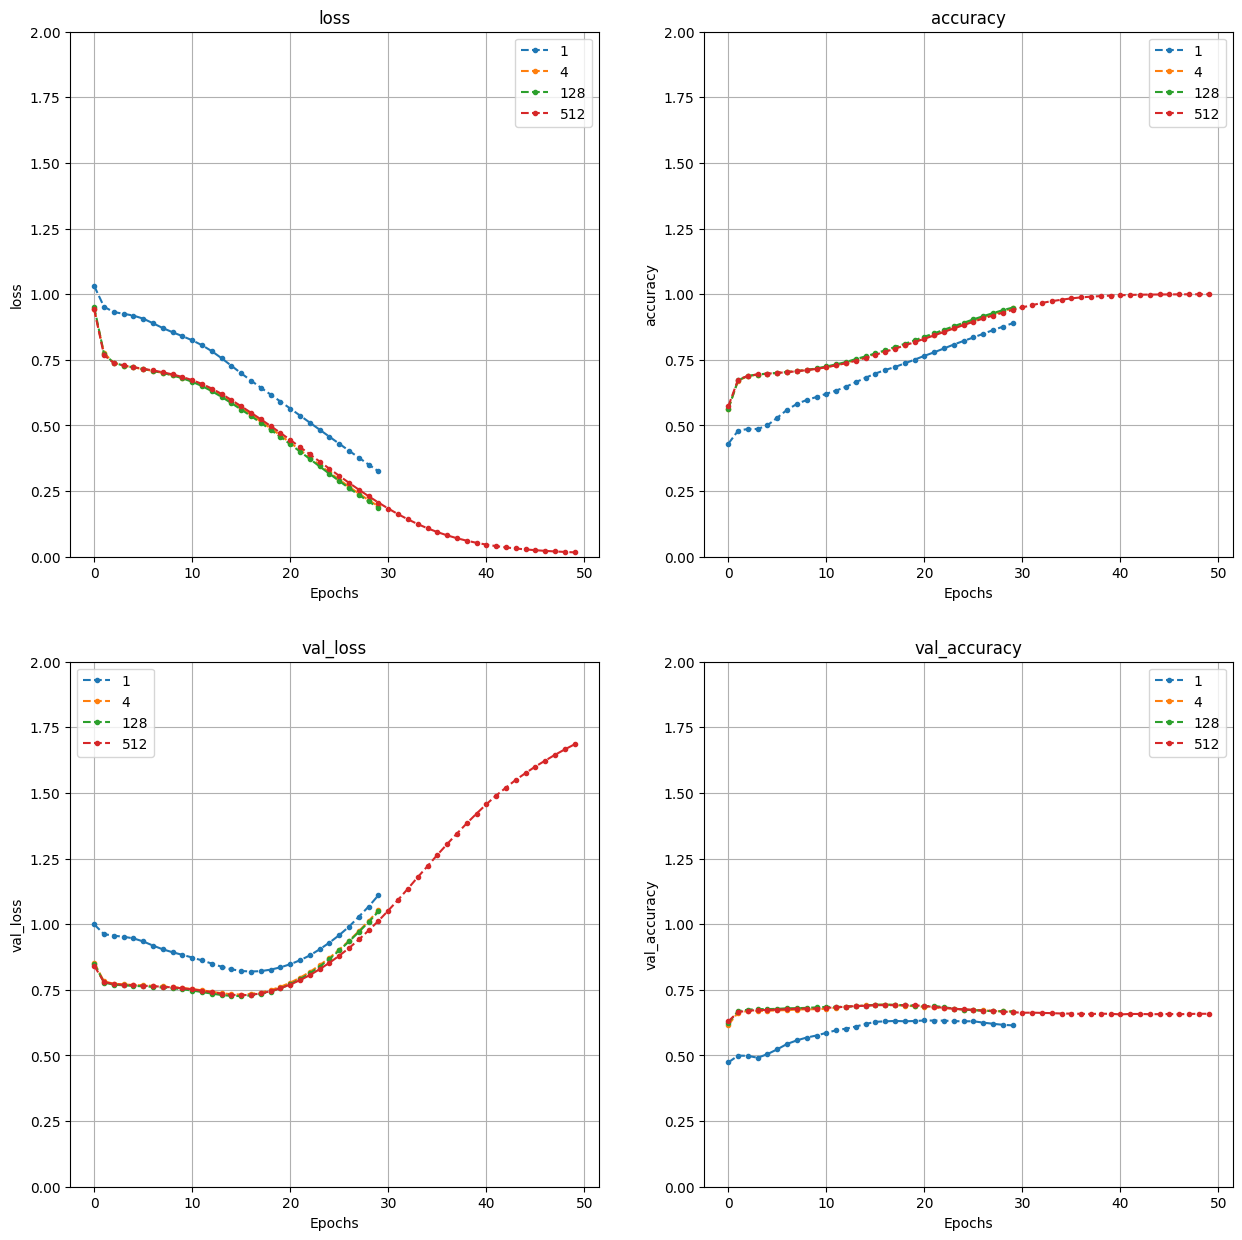

In [66]:
plt.figure(figsize=(15,15))
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
model_sizes = [1, 4, 128, 512]
for i, score in enumerate(scores):
    plt.subplot(2,2,i+1)
    plt.ylim(0, 2)
    plt.grid(True)
    for model_size in model_sizes:
        plt.plot(histories[model_size].history[score], label=f"{model_size}", marker=".", linestyle="--")
        plt.xlabel("Epochs")
        plt.ylabel(score)
        plt.title(f"{score}")
    plt.legend(loc="best")
plt.show()

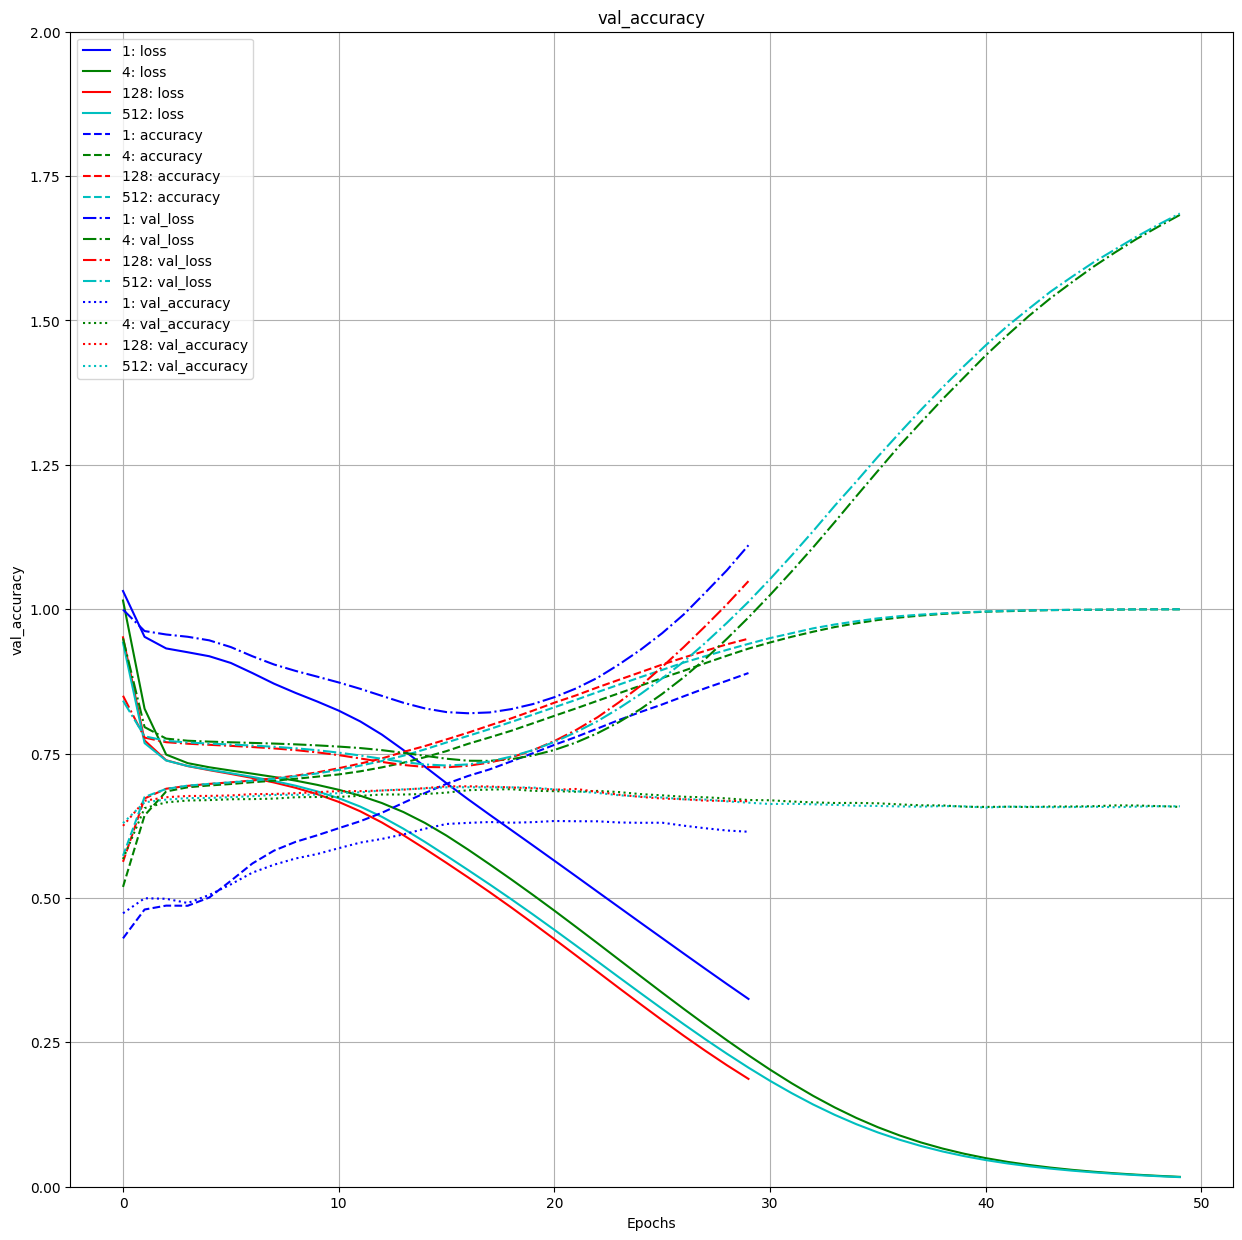

In [104]:
plt.figure(figsize=(15,15))
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
model_sizes = [1, 4, 128, 512]
colors = ["b", "g", "r", "c"]
linestyles = ["-", "--", "-.", ":"]
for i, score in enumerate(scores):
    plt.ylim(0, 2)
    plt.grid(True)
    for j, model_size in enumerate(model_sizes):
        plt.plot(histories[model_size].history[score], label=f"{model_size}: {score}", color=colors[j], linestyle=linestyles[i])
        plt.xlabel("Epochs")
        plt.ylabel(score)
        plt.title(f"{score}")
    plt.legend(loc="best")
plt.show()

- Assurez-vous que le **nombre d'époques d'entraînement** est suffisant pour **observer une augmentation de la perte de validation**. **Conseil** : Lors du développement du modèle, commencez avec un petit nombre d'époques, comme 5 ou 10. Une fois que le modèle semble bien fonctionner, testez avec des valeurs plus importantes, comme 40 ou 80 époques, ce qui s'est avéré raisonnable dans nos tests. En fonction de vos observations, envisagez de mener des expériences supplémentaires, si nécessaire. Combien d'époques ont finalement été nécessaires ?

In [28]:
# Code cell

> ## OBSERVATIONS FROM VARYING HIDDEN LAYER SIZE
>
> After having plotted the accuracy and loss of each model for both the training and validation data, we can see that as from 4 nodes and upwards the scores of the model with epochs barely change. We conclude that a value of around 4 nodes for the hidden layer is suitable for our needs.  
> Moreover, we can see that all the models we trained so far perform better on the training data with increasing number of epochs, nearly reaching 100% accuracy and 0% loss with 50 epoochs. However, we also see that the results on the validation data do not reflect that trend and the accuracy and loss worsen after around 15-20 epochs. This indicates that the models are overfitting to the training data.

- **Variation du nombre de couches**.

    - Réalisez des expériences similaires à celles décrites ci-dessus, mais cette fois en faisant varier le nombre de couches de 1 à 4. Documentez vos résultats.

In [70]:
# Code cell
histories2 = {}
def create_model(num_layers, pyramid=False, starting_size=32):
    print(f"Creating model with {num_layers} layers")
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(462, input_dim=462, activation='relu'))
    for i in range(num_layers):
        model.add(tf.keras.layers.Dense(starting_size//2**(i)))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    return model

- Combien de nœuds chaque couche devrait-elle contenir ? Testez au moins deux scénarios. Traditionnellement, une stratégie courante consistait à diminuer le nombre de nœuds de la couche d'entrée à la couche de sortie, souvent en divisant par deux, pour créer une structure en pyramide. Cependant, l'expérience récente suggère que le maintien d'un nombre constant de nœuds dans toutes les couches peut également bien fonctionner. Décrivez vos observations. Il est acceptable que les deux stratégies produisent des résultats similaires en termes de performance.

In [30]:
# Code cell

In [74]:
for model_size, hist in histories.items():
    histories2[(1, False, model_size)] = hist

for num_layers in [2, 3]: # we skip num_layers = 1 as we already found results for it 
    for pyramid in [True, False]:
        for starting_size in [4, 8, 16]:
            model = create_model(num_layers, pyramid, starting_size)
            history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=30)
            histories2[(num_layers, pyramid, starting_size)] = history
            
for pyramid in [True, False]:
    for starting_size in [8, 16, 32]:
        model = create_model(4, pyramid, starting_size) # num_layers = 4
        history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=30)
        histories2[(4, pyramid, starting_size)] = history

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4780 - loss: 1.0304 - val_accuracy: 0.5847 - val_loss: 0.8799
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6404 - loss: 0.8186 - val_accuracy: 0.6627 - val_loss: 0.7849
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6837 - loss: 0.7458 - val_accuracy: 0.6696 - val_loss: 0.7735
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6904 - loss: 0.7302 - val_accuracy: 0.6699 - val_loss: 0.7695
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6968 - loss: 0.7200 - val_accuracy: 0.6705 - val_loss: 0.7666
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7015 - loss: 0.7100 - val_accuracy: 0.6727 - val_loss: 0.7633
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7066 - loss: 0.6984 - val_accuracy: 0.6736 - val_loss: 0.7591
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7133 - loss: 0.6836 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4371 - loss: 1.0439 - val_accuracy: 0.5663 - val_loss: 0.9231
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6179 - loss: 0.8499 - val_accuracy: 0.6549 - val_loss: 0.7888
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6830 - loss: 0.7485 - val_accuracy: 0.6638 - val_loss: 0.7728
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6915 - loss: 0.7302 - val_accuracy: 0.6686 - val_loss: 0.7688
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.6955 - loss: 0.7203 - val_accuracy: 0.6712 - val_loss: 0.7662
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7008 - loss: 0.7108 - val_accuracy: 0.6727 - val_loss: 0.7633
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7053 - loss: 0.6998 - val_accuracy: 0.6747 - val_loss: 0.7602
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7131 - loss: 0.6859 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5055 - loss: 0.9901 - val_accuracy: 0.6400 - val_loss: 0.8100
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 0.6775 - loss: 0.7646 - val_accuracy: 0.6678 - val_loss: 0.7789
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6914 - loss: 0.7358 - val_accuracy: 0.6718 - val_loss: 0.7733
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6946 - loss: 0.7245 - val_accuracy: 0.6724 - val_loss: 0.7703
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6998 - loss: 0.7147 - val_accuracy: 0.6740 - val_loss: 0.7677
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7052 - loss: 0.7038 - val_accuracy: 0.6757 - val_loss: 0.7646
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7121 - loss: 0.6904 - val_accuracy: 0.6765 - val_loss: 0.7606
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7203 - loss: 0.6727 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4289 - loss: 1.0645 - val_accuracy: 0.5678 - val_loss: 0.9830
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5964 - loss: 0.9127 - val_accuracy: 0.6213 - val_loss: 0.8425
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6638 - loss: 0.7856 - val_accuracy: 0.6642 - val_loss: 0.7788
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6879 - loss: 0.7378 - val_accuracy: 0.6711 - val_loss: 0.7716
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6932 - loss: 0.7254 - val_accuracy: 0.6716 - val_loss: 0.7684
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6977 - loss: 0.7161 - val_accuracy: 0.6742 - val_loss: 0.7658
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7019 - loss: 0.7064 - val_accuracy: 0.6757 - val_loss: 0.7633
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7078 - loss: 0.6949 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5097 - loss: 0.9982 - val_accuracy: 0.6484 - val_loss: 0.8064
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6788 - loss: 0.7612 - val_accuracy: 0.6655 - val_loss: 0.7789
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6907 - loss: 0.7351 - val_accuracy: 0.6682 - val_loss: 0.7739
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6950 - loss: 0.7239 - val_accuracy: 0.6680 - val_loss: 0.7709
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7000 - loss: 0.7138 - val_accuracy: 0.6705 - val_loss: 0.7680
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7057 - loss: 0.7026 - val_accuracy: 0.6744 - val_loss: 0.7643
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.7119 - loss: 0.6888 - val_accuracy: 0.6767 - val_loss: 0.7593
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7210 - loss: 0.6706 - val_accur

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4788 - loss: 1.0253 - val_accuracy: 0.6260 - val_loss: 0.8318
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6711 - loss: 0.7759 - val_accuracy: 0.6623 - val_loss: 0.7810
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6870 - loss: 0.7396 - val_accuracy: 0.6666 - val_loss: 0.7744
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6918 - loss: 0.7287 - val_accuracy: 0.6686 - val_loss: 0.7714
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6964 - loss: 0.7201 - val_accuracy: 0.6720 - val_loss: 0.7692
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7004 - loss: 0.7111 - val_accuracy: 0.6743 - val_loss: 0.7668
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7059 - loss: 0.7007 - val_accuracy: 0.6746 - val_loss: 0.7640
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7123 - loss: 0.6875 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4042 - loss: 1.0674 - val_accuracy: 0.4207 - val_loss: 1.0532
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4355 - loss: 1.0067 - val_accuracy: 0.4864 - val_loss: 0.9634
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5083 - loss: 0.9287 - val_accuracy: 0.5263 - val_loss: 0.9321
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5647 - loss: 0.8925 - val_accuracy: 0.5531 - val_loss: 0.9091
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5855 - loss: 0.8692 - val_accuracy: 0.5636 - val_loss: 0.8967
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5952 - loss: 0.8535 - val_accuracy: 0.5721 - val_loss: 0.8872
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6055 - loss: 0.8375 - val_accuracy: 0.5820 - val_loss: 0.8762
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6204 - loss: 0.8153 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4864 - loss: 1.0187 - val_accuracy: 0.6197 - val_loss: 0.8451
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6668 - loss: 0.7851 - val_accuracy: 0.6695 - val_loss: 0.7797
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6878 - loss: 0.7396 - val_accuracy: 0.6716 - val_loss: 0.7734
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6942 - loss: 0.7260 - val_accuracy: 0.6712 - val_loss: 0.7703
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6990 - loss: 0.7147 - val_accuracy: 0.6735 - val_loss: 0.7674
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7063 - loss: 0.7023 - val_accuracy: 0.6755 - val_loss: 0.7639
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.7146 - loss: 0.6864 - val_accuracy: 0.6782 - val_loss: 0.7594
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7240 - loss: 0.6644 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4653 - loss: 1.0376 - val_accuracy: 0.6103 - val_loss: 0.8611
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6542 - loss: 0.8006 - val_accuracy: 0.6666 - val_loss: 0.7814
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6872 - loss: 0.7416 - val_accuracy: 0.6695 - val_loss: 0.7733
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6939 - loss: 0.7270 - val_accuracy: 0.6716 - val_loss: 0.7695
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6998 - loss: 0.7155 - val_accuracy: 0.6746 - val_loss: 0.7658
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7061 - loss: 0.7029 - val_accuracy: 0.6751 - val_loss: 0.7614
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7140 - loss: 0.6868 - val_accuracy: 0.6805 - val_loss: 0.7555
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7243 - loss: 0.6646 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5145 - loss: 1.0108 - val_accuracy: 0.5900 - val_loss: 0.8978
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6166 - loss: 0.8690 - val_accuracy: 0.5958 - val_loss: 0.8859
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6226 - loss: 0.8543 - val_accuracy: 0.5983 - val_loss: 0.8828
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6266 - loss: 0.8453 - val_accuracy: 0.5978 - val_loss: 0.8803
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6312 - loss: 0.8361 - val_accuracy: 0.5982 - val_loss: 0.8778
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6356 - loss: 0.8248 - val_accuracy: 0.5989 - val_loss: 0.8753
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6417 - loss: 0.8095 - val_accuracy: 0.5974 - val_loss: 0.8741
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6508 - loss: 0.7883 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3993 - loss: 1.0630 - val_accuracy: 0.5052 - val_loss: 1.0155
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5903 - loss: 0.9233 - val_accuracy: 0.6581 - val_loss: 0.7943
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6806 - loss: 0.7534 - val_accuracy: 0.6700 - val_loss: 0.7780
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6904 - loss: 0.7345 - val_accuracy: 0.6705 - val_loss: 0.7738
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6961 - loss: 0.7242 - val_accuracy: 0.6718 - val_loss: 0.7712
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7010 - loss: 0.7144 - val_accuracy: 0.6723 - val_loss: 0.7689
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.7067 - loss: 0.7034 - val_accuracy: 0.6732 - val_loss: 0.7667
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7124 - loss: 0.6894 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5087 - loss: 1.0027 - val_accuracy: 0.6186 - val_loss: 0.8430
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.6636 - loss: 0.7854 - val_accuracy: 0.6618 - val_loss: 0.7786
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6889 - loss: 0.7388 - val_accuracy: 0.6672 - val_loss: 0.7716
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6951 - loss: 0.7252 - val_accuracy: 0.6693 - val_loss: 0.7676
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7000 - loss: 0.7134 - val_accuracy: 0.6719 - val_loss: 0.7640
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7065 - loss: 0.6999 - val_accuracy: 0.6753 - val_loss: 0.7599
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7150 - loss: 0.6822 - val_accuracy: 0.6774 - val_loss: 0.7549
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7257 - loss: 0.6577 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4146 - loss: 1.0707 - val_accuracy: 0.5314 - val_loss: 1.0201
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5809 - loss: 0.9327 - val_accuracy: 0.5897 - val_loss: 0.8952
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6131 - loss: 0.8639 - val_accuracy: 0.5927 - val_loss: 0.8884
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6195 - loss: 0.8531 - val_accuracy: 0.5950 - val_loss: 0.8856
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6253 - loss: 0.8452 - val_accuracy: 0.5960 - val_loss: 0.8833
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6291 - loss: 0.8368 - val_accuracy: 0.5966 - val_loss: 0.8809
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6344 - loss: 0.8258 - val_accuracy: 0.5972 - val_loss: 0.8779
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6408 - loss: 0.8103 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4509 - loss: 1.0339 - val_accuracy: 0.5457 - val_loss: 0.9218
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5785 - loss: 0.8823 - val_accuracy: 0.5816 - val_loss: 0.8807
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6334 - loss: 0.8159 - val_accuracy: 0.6632 - val_loss: 0.7840
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6889 - loss: 0.7353 - val_accuracy: 0.6705 - val_loss: 0.7710
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6975 - loss: 0.7169 - val_accuracy: 0.6730 - val_loss: 0.7650
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7056 - loss: 0.7008 - val_accuracy: 0.6762 - val_loss: 0.7599
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7161 - loss: 0.6801 - val_accuracy: 0.6797 - val_loss: 0.7562
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7279 - loss: 0.6516 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5133 - loss: 0.9977 - val_accuracy: 0.5887 - val_loss: 0.8799
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6367 - loss: 0.8206 - val_accuracy: 0.6623 - val_loss: 0.7843
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6869 - loss: 0.7397 - val_accuracy: 0.6700 - val_loss: 0.7755
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6944 - loss: 0.7229 - val_accuracy: 0.6716 - val_loss: 0.7713
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7015 - loss: 0.7086 - val_accuracy: 0.6749 - val_loss: 0.7675
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7094 - loss: 0.6914 - val_accuracy: 0.6774 - val_loss: 0.7637
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7224 - loss: 0.6677 - val_accuracy: 0.6786 - val_loss: 0.7612
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7352 - loss: 0.6369 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4021 - loss: 1.0636 - val_accuracy: 0.4623 - val_loss: 1.0078
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4714 - loss: 0.9623 - val_accuracy: 0.5072 - val_loss: 0.9524
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5417 - loss: 0.9124 - val_accuracy: 0.5434 - val_loss: 0.9213
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5765 - loss: 0.8795 - val_accuracy: 0.5588 - val_loss: 0.9058
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5905 - loss: 0.8610 - val_accuracy: 0.5686 - val_loss: 0.8977
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6014 - loss: 0.8461 - val_accuracy: 0.5735 - val_loss: 0.8913
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6132 - loss: 0.8283 - val_accuracy: 0.5785 - val_loss: 0.8860
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6298 - loss: 0.8014 - 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4437 - loss: 1.0202 - val_accuracy: 0.5429 - val_loss: 0.9497
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5982 - loss: 0.8838 - val_accuracy: 0.6623 - val_loss: 0.7911
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6854 - loss: 0.7478 - val_accuracy: 0.6670 - val_loss: 0.7795
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6923 - loss: 0.7290 - val_accuracy: 0.6699 - val_loss: 0.7760
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6988 - loss: 0.7165 - val_accuracy: 0.6738 - val_loss: 0.7733
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7053 - loss: 0.7034 - val_accuracy: 0.6762 - val_loss: 0.7703
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7145 - loss: 0.6869 - val_accuracy: 0.6765 - val_loss: 0.7657
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.7249 - loss: 0.6634 

/home/kc/dev/2249/CSI4506/Devoir3/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4993 - loss: 1.0046 - val_accuracy: 0.6317 - val_loss: 0.8269
Epoch 2/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6700 - loss: 0.7737 - val_accuracy: 0.6632 - val_loss: 0.7846
Epoch 3/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6879 - loss: 0.7365 - val_accuracy: 0.6650 - val_loss: 0.7773
Epoch 4/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6955 - loss: 0.7218 - val_accuracy: 0.6693 - val_loss: 0.7732
Epoch 5/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7029 - loss: 0.7086 - val_accuracy: 0.6712 - val_loss: 0.7692
Epoch 6/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7109 - loss: 0.6926 - val_accuracy: 0.6734 - val_loss: 0.7649
Epoch 7/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7211 - loss: 0.6705 - val_accuracy: 0.6751 - val_loss: 0.7608
Epoch 8/30
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7344 - loss: 0.6406 - 

<Figure size 1500x1500 with 0 Axes>

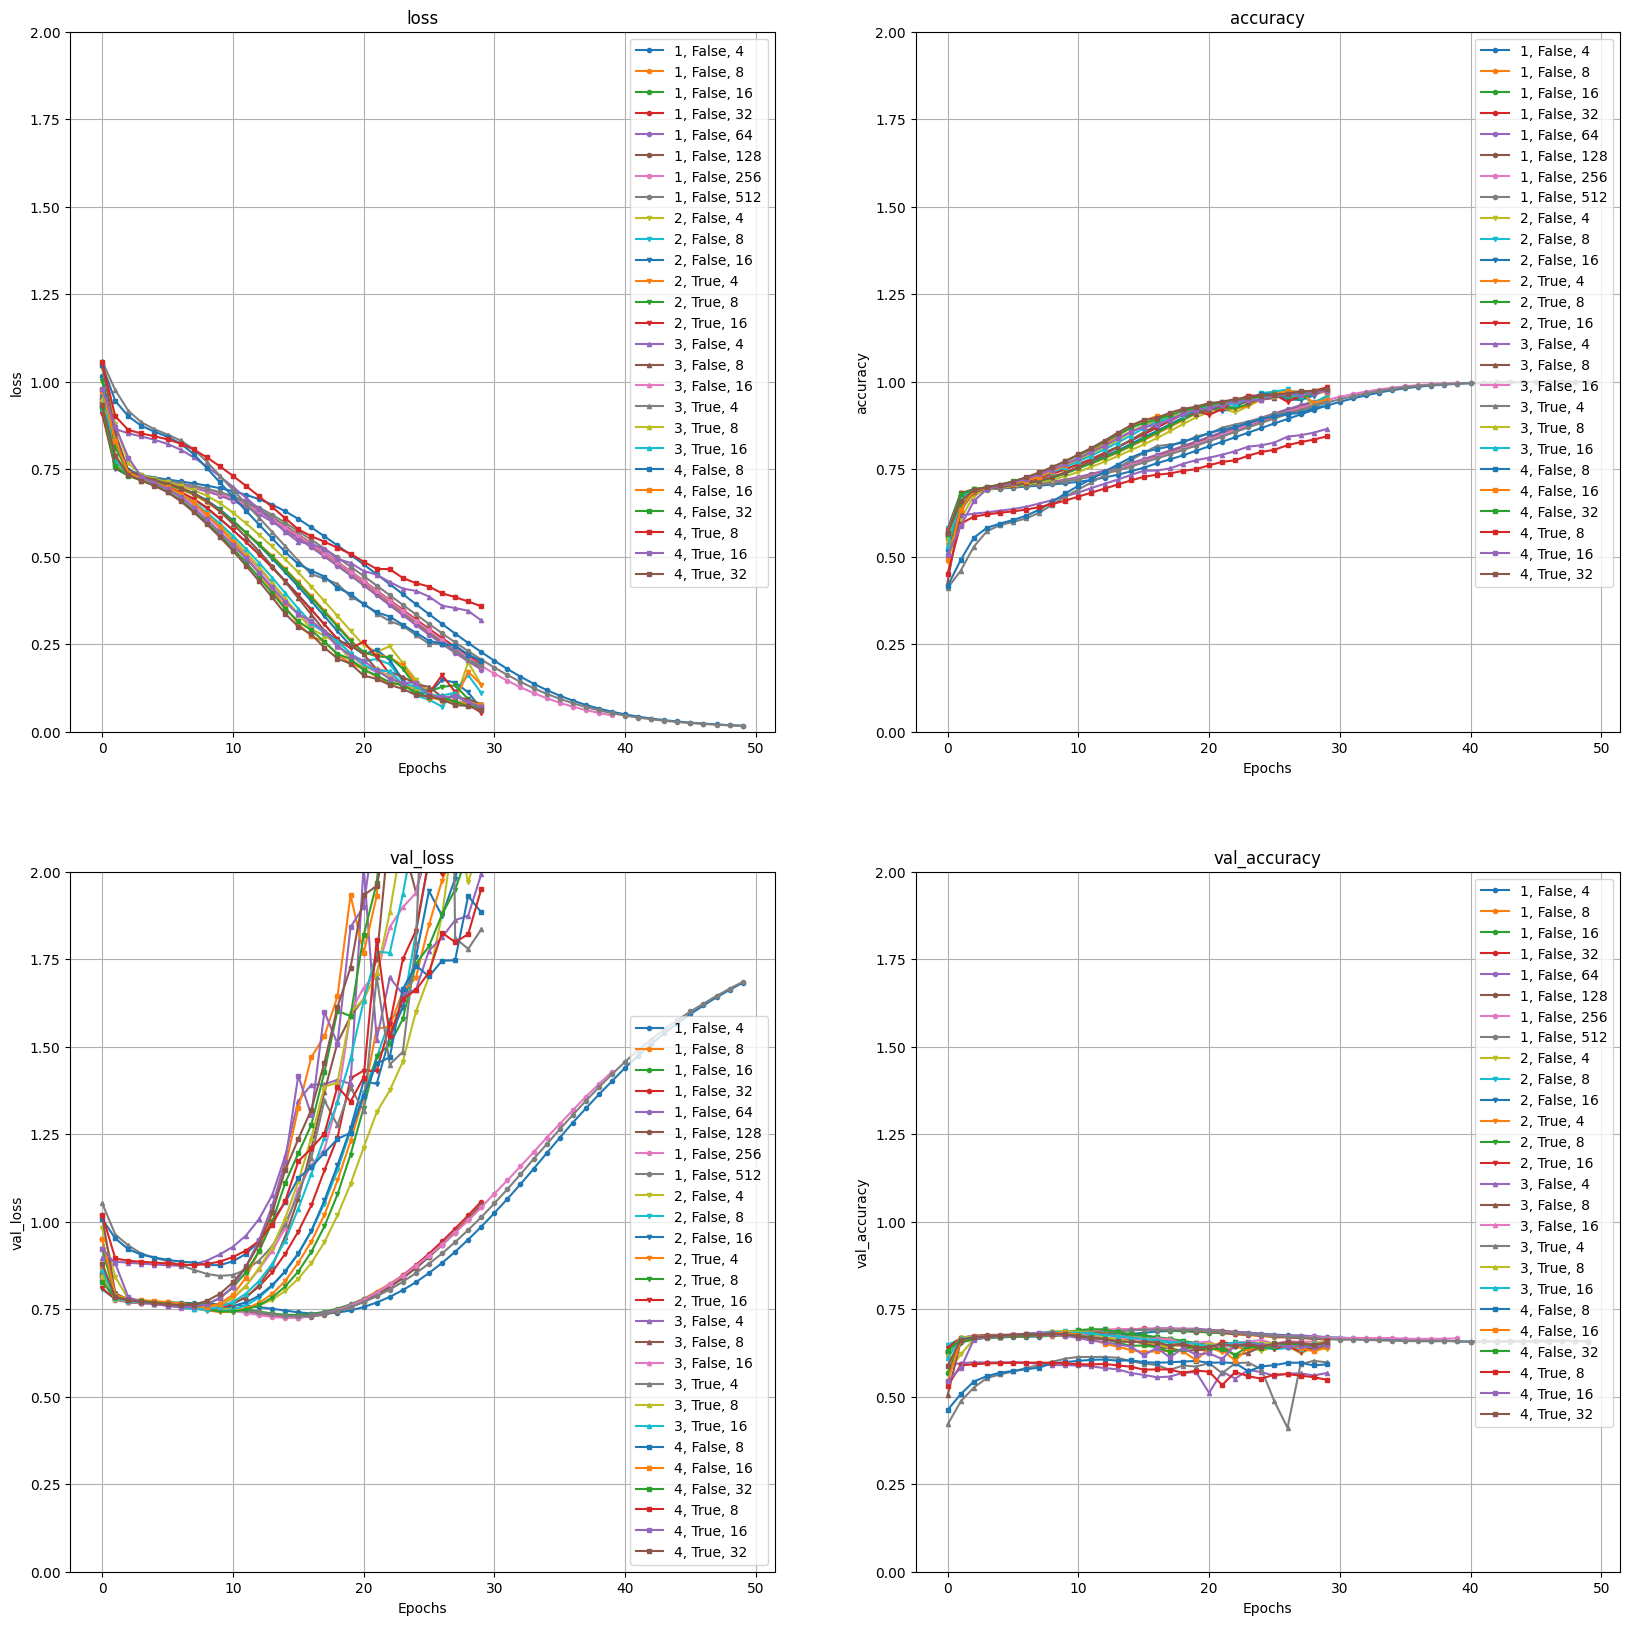

In [106]:
plt.figure(figsize=(15,15))
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
num_layers = [1, 2, 3, 4]
pyramid = [0, 1]
starting_size = [4, 8, 16, 32, 64, 128, 256, 512]

hist2_dict = {}
for num_layer in num_layers:
    hist2_dict[num_layer] = {}
    for size in starting_size:
        hist2_dict[num_layer][size] = {}
        for pyr in pyramid:
            if (num_layer, pyr, size) in histories2:
                hist2_dict[num_layer][size][pyr] = histories2[(num_layer, pyr, size)]
            
markers = ['o', 'v', '^', 's', 'P', 'D']

plt.figure(figsize=(20,20))
for i, score in enumerate(scores):
    plt.subplot(2,2,i+1)
    plt.ylim(0, 2)
    plt.grid(True)
    for num_layer in num_layers:
        for pyr in pyramid:
            for size in starting_size:
                try:
                    curr_hist = hist2_dict[num_layer][size][pyr]
                except KeyError:
                    continue
                
                marker = markers[num_layer-1]
                plt.plot(curr_hist.history[score], label=f"{num_layer}, {'True' if pyr else 'False'}, {size}", marker=marker, markersize=3)
                plt.xlabel("Epochs")
                plt.ylabel(score)
                plt.title(f"{score}")
    plt.legend(loc="best")
plt.show()

> # OBSERVATIONS
>
> Similar to when we tried different hidden layer sizes, we can see that the models work very well for the training data but not for the validation data. This is the sign of overfitting.  
> Other than that, the models seem to perform similarly.   
> The models that seem to stand out are:  
> - Num_layers: 1, Starting_num_nodes: 4, Pyramid: N/A  
> - Num_layers: 4, Starting_num_nodes: 8, Pyramid: True

In [1]:
hist1_4_0 = hist2_dict[1][4][False]
hist4_8_1 = hist2_dict[4][8][True]

plt.figure(figsize=(15,15))
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
for i, score in enumerate(scores):
    plt.subplot(2,2,i+1)
    plt.ylim(0, 2)
    plt.grid(True)
    plt.plot(hist1_4_0.history[score], label=f"1, False, 4", marker=".", linestyle="--")
    plt.plot(hist4_8_1.history[score], label=f"4, True, 8", marker=".", linestyle="--")
    plt.xlabel("Epochs")
    plt.ylabel(score)
    plt.title(f"{score}")
    plt.legend(loc="best")
plt.show()

NameError: name 'hist2_dict' is not defined

- Sélectionnez un de vos modèles qui illustre le surapprentissage. Dans nos expériences, nous avons facilement construit un modèle atteignant près de 100 % de précision sur les données d'entraînement, sans aucune amélioration similaire sur l'ensemble de validation. Présentez ce réseau de neurones avec ses graphiques de précision et de perte. Expliquez pourquoi vous concluez que le modèle surapprend.

In [31]:
# Code cell
# As mentioned before all the models are overfitting after a given point
# The models are overfitting as they perform very well on the training set, achieving close to 100% accuracy and low loss. However, there is a large gap with the performance on the validation set, which indicates that the model is overfitting.

# We choose the model with 4 hidden layers and 8 nodes per layer with a pyramid structure as it starts to overfit at an earlier epochs\
hist4_8_1 = hist2_dict[4][8][True]

plt.figure(figsize=(15,15))
plt.ylim(0, 2)
plt.grid(True)
scores = ["loss", "accuracy", "val_loss", "val_accuracy"]
for i, score in enumerate(scores):
    plt.plot(hist4_8_1.history[score], label=f"4, True, 8", marker=".", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel(score)
plt.title(f"{score}")
plt.legend(loc="best")
plt.show()

- **Fonction d'activation**.

    - Présentez les résultats pour une des configurations mentionnées ci-dessus en variant la fonction d'activation. Testez au moins `relu` (le paramètre par défaut) et `sigmoid`. Le choix du modèle spécifique, y compris le nombre de couches et de nœuds, est à votre discrétion. Documentez vos observations en conséquence.

In [32]:
# Code cell
activations = ["relu", "tanh", "sigmoid"]
for activation in activations:
    model = tf.keras.Sequential()
    
    # we choose the number of nodes, layers and whether to use pyramid or not based on the previous results
    model.add(tf.keras.layers.Dense(462, input_dim=462, activation=activation))
    model.add(tf.keras.layers.Dense(8))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=50)
    
    pd.DataFrame(history.history).plot(
        grid=True, figsize=(10, 7), title="Loss and Accuracy", style="--.", ylim=(0, 2)
    )
    plt.legend(loc="best")
    plt.title(f"Activation function: {activation}")
    plt.xlabel("Epochs")
    plt.show()

- **Régularisation** dans les réseaux de neurones est une technique utilisée pour éviter le surapprentissage.

    - Une technique consiste à ajouter une pénalité à la fonction de perte pour décourager les modèles excessivement complexes. Appliquez une pénalité `l2` à certaines ou à toutes les couches. Soyez prudent, car des pénalités trop agressives se sont révélées problématiques dans nos expériences. Commencez avec la valeur par défaut `l2` de 0.01, puis réduisez-la à 0.001 et à 1e-4. Sélectionnez un modèle spécifique parmi les expériences ci-dessus et présentez un cas où vous avez réussi à réduire le surapprentissage. Incluez une paire de graphiques comparant les résultats avec et sans régularisation. Expliquez votre raisonnement pour conclure que le surapprentissage a été réduit. N'espérez pas éliminer complètement le surapprentissage. Encore une fois, il s'agit d'un ensemble de données difficile à travailler.

In [33]:
# Code cell

for penalty_val in [0.01, 0.001, 0.0001]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(462, input_dim=462, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(penalty_val)))
    model.add(tf.keras.layers.Dense(8), kernel_regularizer=tf.keras.regularizers.l2(penalty_val))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=50)
    
    pd.DataFrame(history.history).plot(
        grid=True, figsize=(10, 7), title="Loss and Accuracy", style="--.", ylim=(0, 2)
    )
    plt.legend(loc="best")
    plt.title(f"Penalty value: {penalty_val}")
    plt.xlabel("Epochs")
    plt.show()

- Les couches de **dropout** sont une technique de régularisation dans les réseaux de neurones, où un sous-ensemble aléatoire de neurones est temporairement retiré pendant l'entraînement. Cela aide à éviter le surapprentissage en favorisant la redondance et en améliorant la capacité du réseau à généraliser sur de nouvelles données. Sélectionnez un modèle spécifique parmi les expériences ci-dessus, où vous avez plusieurs couches, et expérimentez l'ajout d'une ou de plusieurs couches de dropout dans votre réseau. Testez deux taux différents, par exemple 0.25 et 0.5. Documentez vos observations.

In [34]:
# Code cell
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(462, input_dim=462, activation='relu'))
tf.keras.layers.Dropout(0.5)
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=50)

pd.DataFrame(history.history).plot(
    grid=True, figsize=(10, 7), title="Loss and Accuracy", style="--.", ylim=(0, 2)
)
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.show()

- Résumez vos expériences en utilisant une représentation graphique telle que la Figure 6.15 [sur cette page](https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html).

In [35]:
# Code cell

- L'**arrêt anticipé** est une technique de régularisation lors de l'entraînement d'un réseau de neurones, où le processus est interrompu lorsque les performances sur l'ensemble de validation commencent à se dégrader, ce qui empêche le réseau d'apprendre le bruit dans les données d'entraînement. Parmi toutes les expériences menées jusqu'à présent, choisissez **une** configuration (le nombre de couches, le nombre de nœuds, la fonction d'activation, la pénalité L2 et les couches de dropout) qui a donné les meilleures performances. Utilisez un graphique de perte et de précision pour déterminer le nombre optimal d'itérations d'entraînement pour ce réseau. Quel est le nombre optimal d'époques pour cette configuration de réseau et pourquoi ?

In [36]:
# Code cell

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(462, input_dim=462, activation='relu'))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=50, callbacks=[early_stop])

pd.DataFrame(history.history).plot(
    grid=True, figsize=(10, 7), title="Loss and Accuracy", style="--.", ylim=(0, 2)
)
plt.legend(loc="best")
plt.xlabel("Epochs")

### Test

9. **Comparaison des modèles** :

    - Évaluez le modèle de référence sur l'ensemble de test, en utilisant l'ensemble de paramètres optimal identifié lors de la recherche de grille. Appliquez également la meilleure configuration de réseau de neurones à l'ensemble de test.

    - Quantifiez les performances du modèle de référence (meilleure configuration d'hyperparamètres) et de votre réseau de neurones (meilleure configuration) en utilisant des métriques telles que la précision, le rappel et le score F1. Comment ces deux modèles se comparent-ils au modèle de base ?

    - Fournissez des recommandations sur le(s) modèle(s) à choisir pour cette tâche et justifiez vos choix en fonction des résultats de l'analyse.

In [37]:
# Code cell

# Resources